# Multiple Linear Regression

Importing the dataset

In [4]:
df= read.csv("Cleaned file.csv",header = TRUE)

In [5]:
colnames(df)

[1] "budget"                                            
 [2] "approximate_count"                                 
 [3] "character_count_body"                              
 [4] "prev_1_cost_per_click"                             
 [5] "prev_2_cost_per_click"                             
 [6] "prev_3_cost_per_click"                             
 [7] "prev_1_clicks"                                     
 [8] "prev_2_clicks"                                     
 [9] "prev_3_clicks"                                     
[10] "prev_1_spend"                                      
[11] "prev_2_spend"                                      
[12] "prev_3_spend"                                      
[13] "interest...Auto.Racing"                            
[14] "interest...Indianapolis.Motor.Speedway"            
[15] "interest...Nascar.Racing"                          
[16] "interest...Nascar.Racing.1"                        
[17] "aws_label_classroom"                               
[18] "aws_label_computer"                                
[19] "aws_label_electronics"                             
[20] "aws_label_lcd_screen"                              
[21] "aws_label_laptop"                                  
[22] "aws_label_pc"                                      
[23] "goal_detail_AWARENESS"                             
[24] "goal_detail_ENGAGEMENT"                            
[25] "goal_detail_PAGEVIEW"                              
[26] "goal_detail_PURCHASE"                              
[27] "goal_detail_SIGNUP"                                
[28] "goal_AWARENESS"                                    
[29] "goal_CONVERSION"                                   
[30] "goal_ENGAGEMENT"                                   
[31] "call_to_action_Apply.Now"                          
[32] "call_to_action_Contact.Us"                         
[33] "call_to_action_Download"                           
[34] "call_to_action_Learn.More"                         
[35] "call_to_action_Shop.Now"                           
[36] "call_to_action_Upgrade"                            
[37] "call_to_action_Vote"                               
[38] "mime_type_image.jpeg"                              
[39] "mime_type_image.png"                               
[40] "genders_F"                                         
[41] "genders_M"                                         
[42] "genders_M.F"                                       
[43] "genders_undefined"                                 
[44] "states_Indiana"                                    
[45] "states_Indiana..Kentucky..Ohio"                    
[46] "states_Indiana..Ohio..Kentucky"                    
[47] "states_None"                                       
[48] "states_indiana..kentucky..ohio..illinois..michigan"
[49] "states_ohio..indiana..kentucky..michigan..illinois"
[50] "states_undefined"                                  
[51] "countries_United.States"                           
[52] "countries_undefined"                               
[53] "languages_English"                                 
[54] "languages_undefined"                               
[55] "age_range_0.0.0.0"                                 
[56] "age_range_18.0.34.0"                               
[57] "age_range_18.0.35.0"                               
[58] "age_range_18.0.54.0"                               
[59] "age_range_25.0.35.0"                               
[60] "age_range_25.0.54.0"                               
[61] "age_range_25.0.55.0"                               
[62] "age_range_30.0.60.0"                               
[63] "age_range_36.0.45.0"                               
[64] "age_range_46.0.55.0"                               
[65] "platform_name_facebook"                            
[66] "cost_per_click"

In [6]:
str(df)

'data.frame':	1833 obs. of  66 variables:
 $ budget                                            : num  27.8 27.8 27.8 27.8 27.8 ...
 $ approximate_count                                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ character_count_body                              : int  139 139 139 139 139 139 139 139 139 139 ...
 $ prev_1_cost_per_click                             : num  0 0.457 1.37 0.685 0.7 ...
 $ prev_2_cost_per_click                             : num  0 0 0.457 1.37 0.685 ...
 $ prev_3_cost_per_click                             : num  0 0 0 0.457 1.37 ...
 $ prev_1_clicks                                     : int  0 3 1 2 2 0 2 6 7 9 ...
 $ prev_2_clicks                                     : int  0 0 3 1 2 2 0 2 6 7 ...
 $ prev_3_clicks                                     : int  0 0 0 3 1 2 2 0 2 6 ...
 $ prev_1_spend                                      : num  0 1.37 1.37 1.37 1.4 ...
 $ prev_2_spend                                      : num  0 0 1.37 1.37 1.37 ...
 $ prev_

Splitting the dataset into the Training set and Test set

In [12]:
library(caTools)
set.seed(123)
split = sample.split(df$cost_per_click, SplitRatio = 0.7)
training_set = subset(df, split == TRUE)
test_set = subset(df, split == FALSE)

In [13]:
dim(training_set)

[1] 1283   66

In [14]:
dim(test_set)

[1] 550  66

Feature Scaling is taken care by function in R

R takes care of Dummy variable trap

In [132]:
regressor = lm(formula =cost_per_click ~ .,data=training_set)

In [133]:
y_pred = predict(regressor, test_set)

Warning message in predict.lm(regressor, test_set):
"prediction from a rank-deficient fit may be misleading"

In [134]:
mse(test_set$cost_per_click,y_pred)

[1] 5.028434

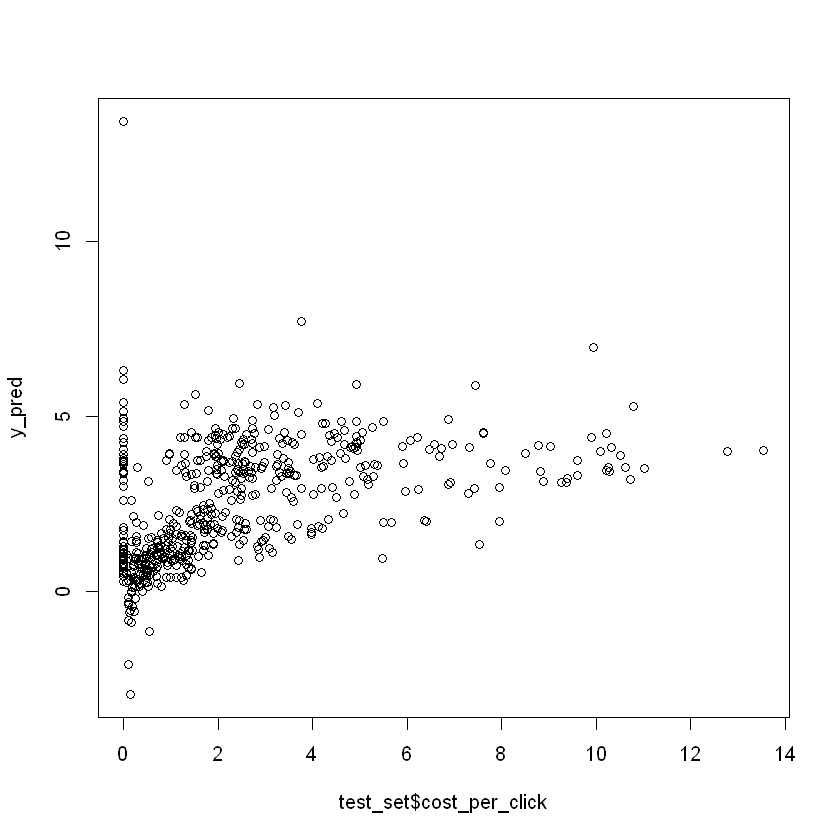

In [136]:
plot(test_set$cost_per_click,y_pred)

In [137]:
cor(test_set$cost_per_click,y_pred)

[1] 0.470305

# Support vector Regression

In [139]:
library(e1071)
regressor = svm(formula = cost_per_click ~ .,
                data = training_set,
                type = 'eps-regression',
                kernel = 'radial')

Warning message in svm.default(x, y, scale = scale, ..., na.action = na.action):
"Variable(s) 'platform_name_facebook' constant. Cannot scale data."

In [140]:
y_pred = predict(regressor, test_set)

In [141]:
mse(test_set$cost_per_click,y_pred)

[1] 5.286179

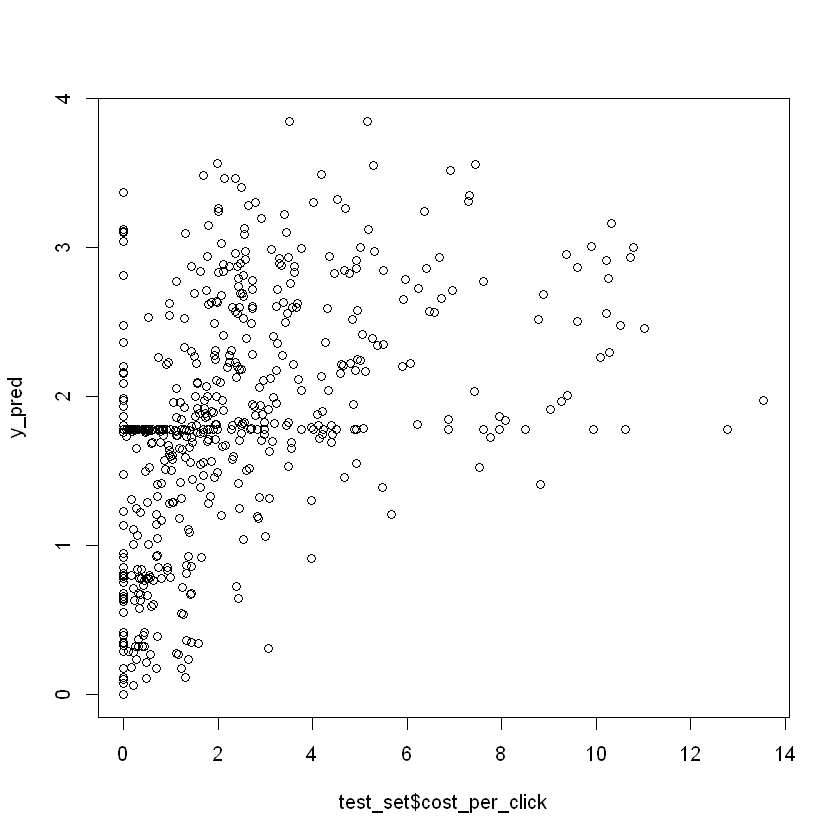

In [143]:
plot(test_set$cost_per_click,y_pred)

In [144]:
cor(test_set$cost_per_click,y_pred)

[1] 0.4527936

# Random forest Regression 

In [145]:
library(randomForest)
set.seed(1234)
regressor = randomForest(x = training_set[,1:65],
                         y = training_set$cost_per_click,
                         ntree = 50)

In [146]:
y_pred = predict(regressor, test_set)

In [147]:
mse(test_set$cost_per_click,y_pred)

[1] 4.680445

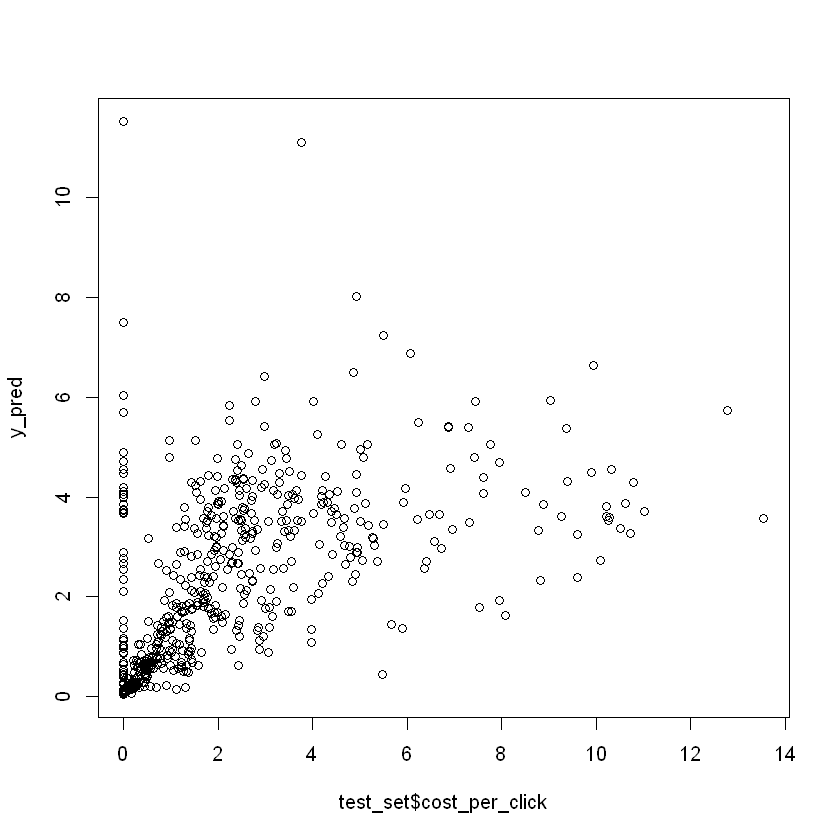

In [149]:
plot(test_set$cost_per_click,y_pred)

In [150]:
cor(test_set$cost_per_click,y_pred)

[1] 0.5190814

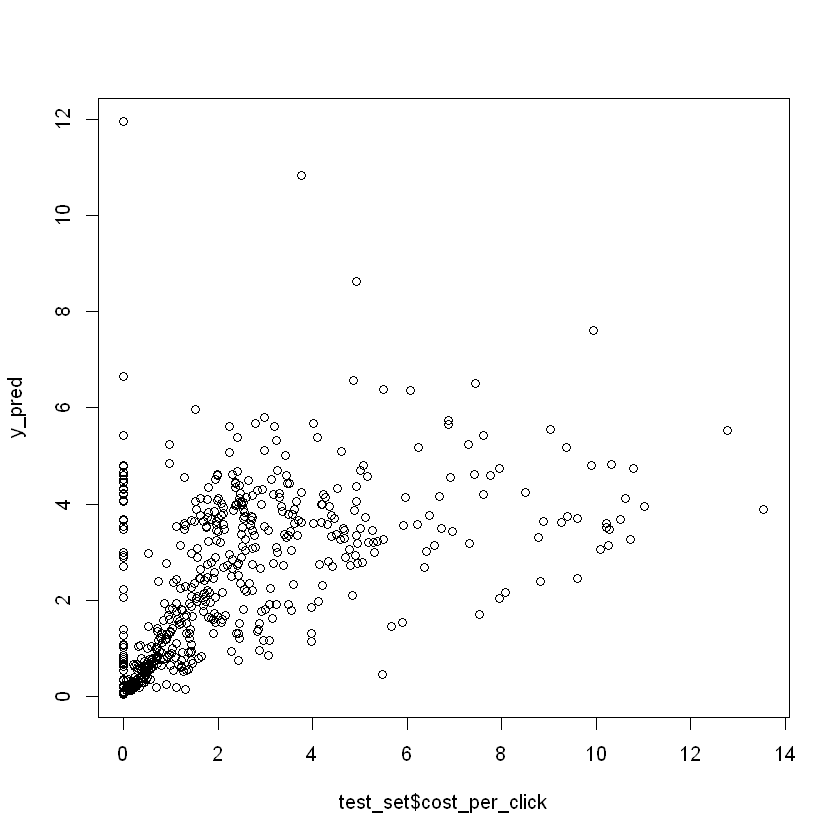

In [152]:
library(randomForest)
set.seed(1234)
regressor = randomForest(x = training_set[,1:65],
                         y = training_set$cost_per_click,
                         ntree = 250)
y_pred = predict(regressor, test_set)
plot(test_set$cost_per_click,y_pred)

In [153]:
mse(test_set$cost_per_click,y_pred)

[1] 4.61616

In [154]:
cor(test_set$cost_per_click,y_pred)

[1] 0.5268141

As the number of trees in random forest increases the Mean Square Error decreases. But the correlation is some what weak